In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline
print("imported Libs")

imported Libs


In [111]:
crimes=pd.read_csv("C:/Users/dc00464642/Desktop/RIDE/datasci_course_materials/assignment6/sanfrancisco_incidents_summer_2014.csv",parse_dates=[['Date', 'Time']])
crimes.head()
print("imported csv")

imported csv


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


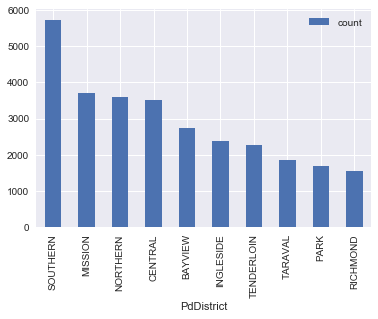

In [126]:
crimes_part1 = crimes[['Category', 'DayOfWeek', 'Date_Time', 'PdDistrict', 'Resolution']]
crimes_part1['count'] = 1
crimes_by_dristrict = (crimes_part1.groupby('PdDistrict')).sum()
category_plot = crimes_by_dristrict.sort_values(by='count',ascending=False).plot(kind='bar')
fig = category_plot.get_figure()
fig.savefig("by_category_plot.png", bbox_inches='tight')

In [118]:
#by date
by_date_district = crimes.pivot_table("IncidntNum", aggfunc='count', index='Date_Time', columns='PdDistrict').resample('60T').sum()
#print(by_date_district)

In [113]:
#create indexes
index_old = by_date_district.index.weekofyear
by_date_district.index.names = ['date_week']
index_week = by_date_district.index.weekofyear
by_date_district.index.names = ['date_month']
index_month = by_date_district.index.month
by_date_district.index.names = ['Date_Time']

In [119]:
#by week
by_week_district = by_date_district.pivot_table(['SOUTHERN','NORTHERN','CENTRAL','MISSION', 'BAYVIEW'], index=index_week, columns=by_date_district.index.dayofweek)
#print(by_week_district)

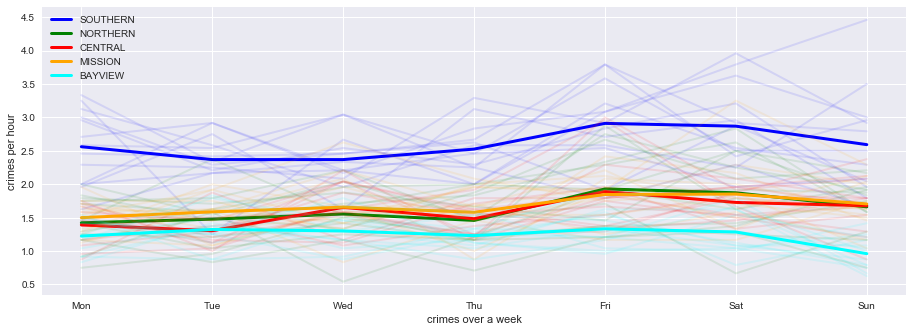

In [127]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.plot(range(7), by_week_district['SOUTHERN'].values.T, color='blue', lw=2, alpha=0.1);
ax.plot(range(7), by_week_district['SOUTHERN'].mean(0), color='blue', lw=3, label='SOUTHERN');
ax.plot(range(7), by_week_district['NORTHERN'].values.T, color='green', lw=2, alpha=0.1);
ax.plot(range(7), by_week_district['NORTHERN'].mean(0), color='green', lw=3, label='NORTHERN');
ax.plot(range(7), by_week_district['CENTRAL'].values.T, color='red', lw=2, alpha=0.1);
ax.plot(range(7), by_week_district['CENTRAL'].mean(0), color='red', lw=3, label='CENTRAL');
ax.plot(range(7), by_week_district['MISSION'].values.T, color='orange', lw=2, alpha=0.1);
ax.plot(range(7), by_week_district['MISSION'].mean(0), color='orange', lw=3, label='MISSION');
ax.plot(range(7), by_week_district['BAYVIEW'].values.T, color='cyan', lw=2, alpha=0.1);
ax.plot(range(7), by_week_district['BAYVIEW'].mean(0), color='cyan', lw=3, label='BAYVIEW');
ax.set_xlabel("crimes over a week")
ax.set_xticklabels(['0','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax.set_ylabel("crimes per hour")
leg = ax.legend();
fig.savefig("by_week_plot.png", bbox_inches='tight')

In [121]:
#by month
by_month_district = by_date_district.pivot_table(['SOUTHERN','NORTHERN','CENTRAL','MISSION', 'BAYVIEW'], index=index_month, columns=by_date_district.index.day)

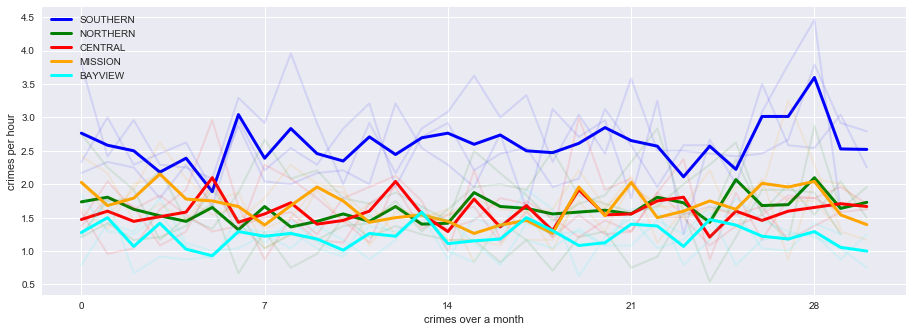

In [128]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.plot(range(31), by_month_district['SOUTHERN'].values.T, color='blue', lw=2, alpha=0.1);
ax.plot(range(31), by_month_district['SOUTHERN'].mean(0), color='blue', lw=3, label='SOUTHERN');
ax.plot(range(31), by_month_district['NORTHERN'].values.T, color='green', lw=2, alpha=0.1);
ax.plot(range(31), by_month_district['NORTHERN'].mean(0), color='green', lw=3, label='NORTHERN');
ax.plot(range(31), by_month_district['CENTRAL'].values.T, color='red', lw=2, alpha=0.1);
ax.plot(range(31), by_month_district['CENTRAL'].mean(0), color='red', lw=3, label='CENTRAL');
ax.plot(range(31), by_month_district['MISSION'].values.T, color='orange', lw=2, alpha=0.1);
ax.plot(range(31), by_month_district['MISSION'].mean(0), color='orange', lw=3, label='MISSION');
ax.plot(range(31), by_month_district['BAYVIEW'].values.T, color='cyan', lw=2, alpha=0.1);
ax.plot(range(31), by_month_district['BAYVIEW'].mean(0), color='cyan', lw=3, label='BAYVIEW');
ax.set_xlabel("crimes over a month")
ax.xaxis.set_ticks(np.arange(0, 31, 7))
ax.set_ylabel("crimes per hour")
leg = ax.legend();
fig.savefig("by_month_plot.png", bbox_inches='tight')